<a href="https://colab.research.google.com/github/robertmadril15/CS4410/blob/main/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False



Linear regression coefficients: 
       age: -60.21981405677255
       sex: -266.4570523220357
       bmi: 523.0634112596989
        bp: 310.5134699670051
        s1: -336.1614738106942
        s2: 137.33929238424523
        s3: -131.1392328345366
        s4: -1.149234801731545
        s5: 622.3286855688123
        s6: 60.46645769168265

Intercept:  152.22822762230342

First 5 Predictions:  [115.46474836  83.4585369  160.77727376 187.65710274  72.72122197]

Fist 5 targets  [ 79.  55. 109. 178.  39.]

Coefficient of determination:  0.5322429620529407
LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421

PLOTS: 


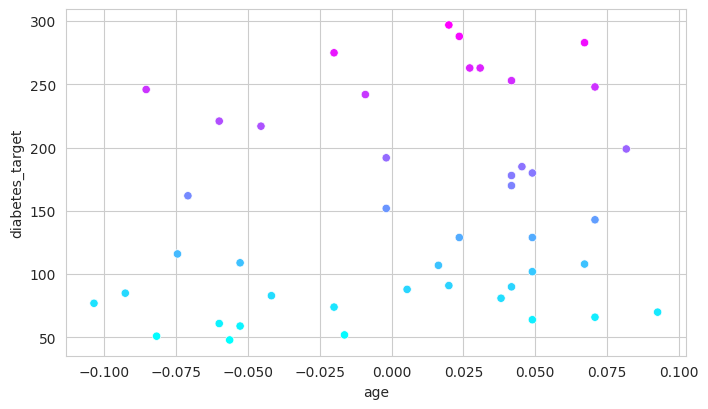

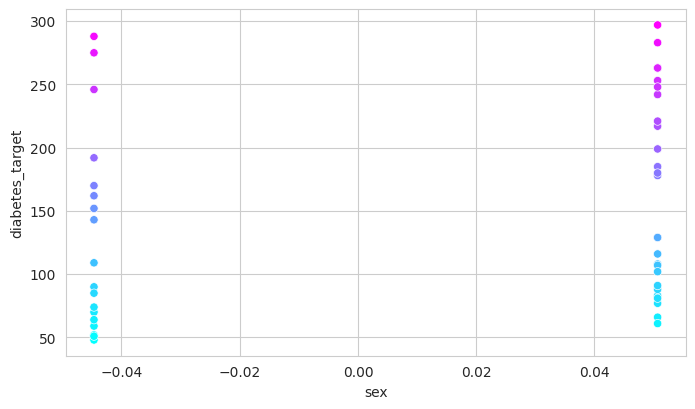

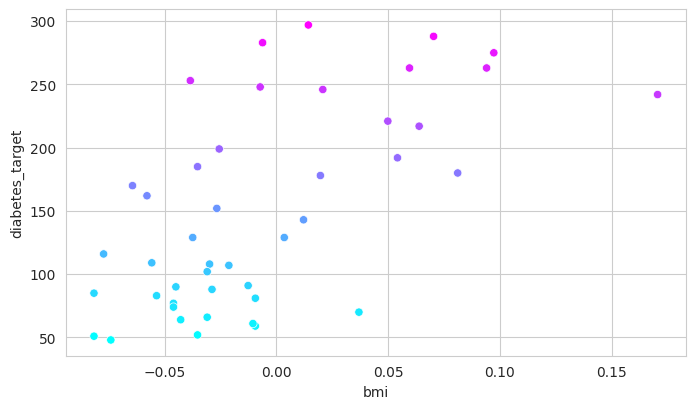

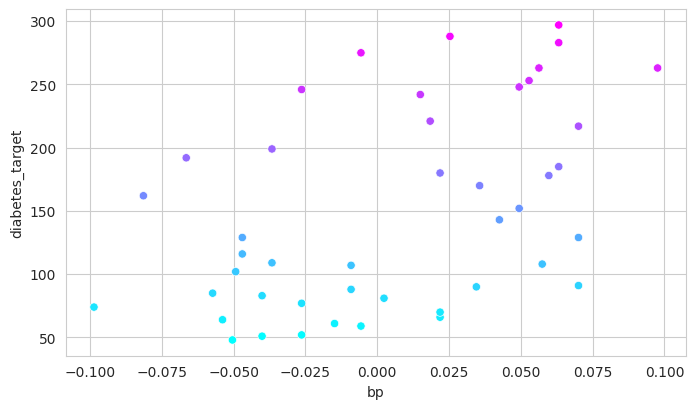

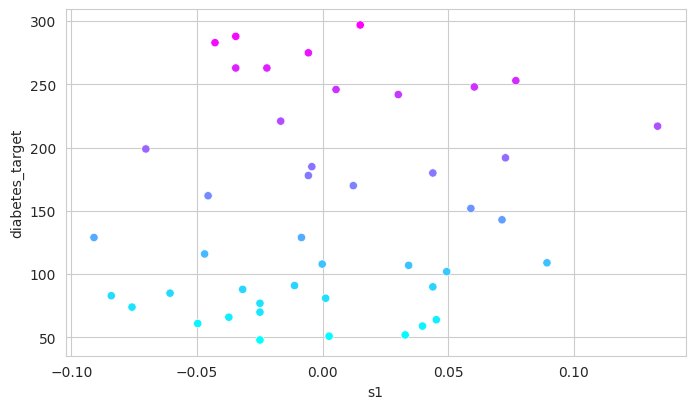

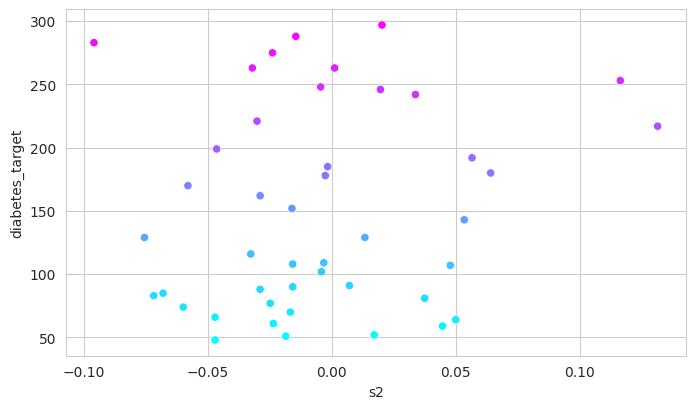

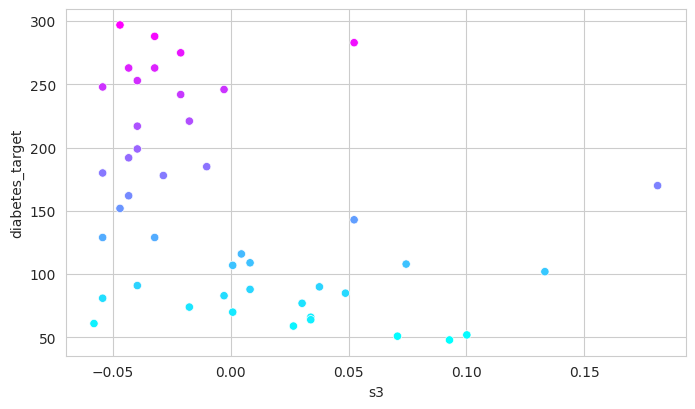

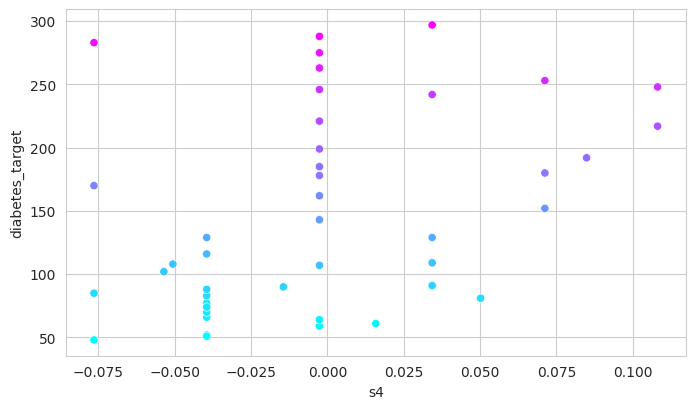

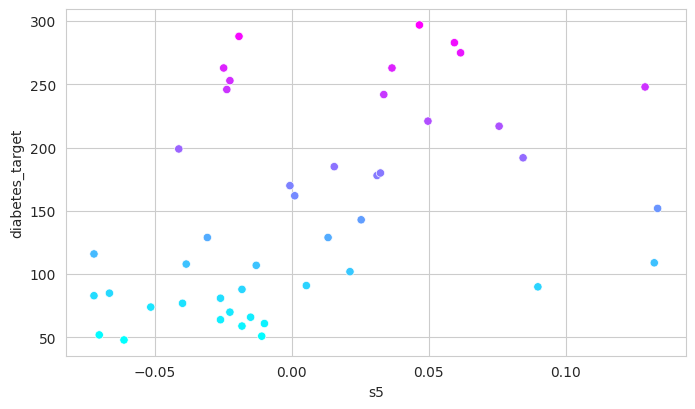

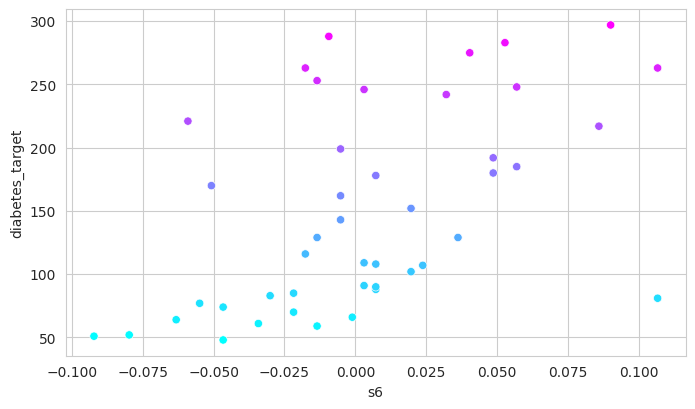

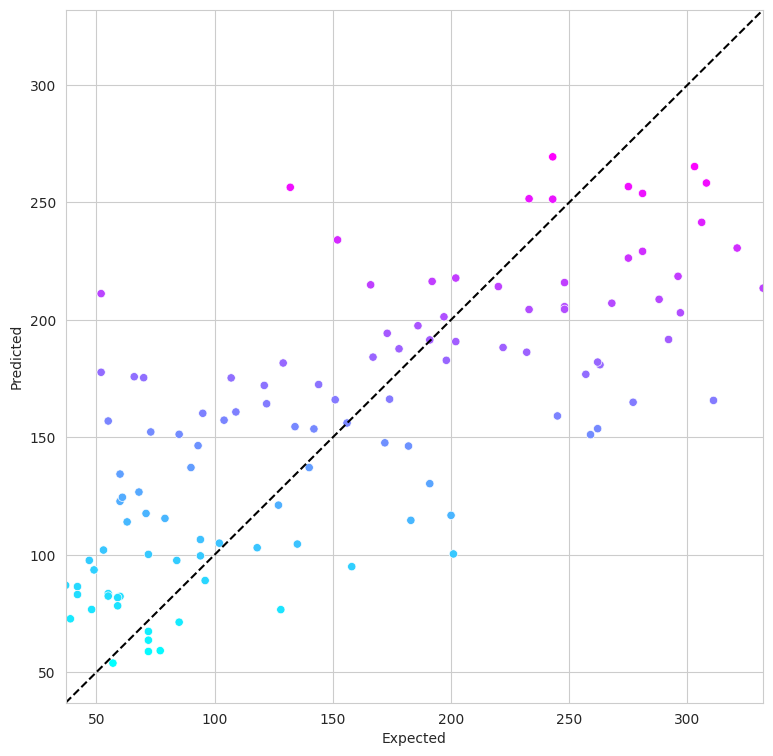

In [51]:
%matplotlib inline
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

print(diabetes.DESCR)

print('Data shape: ', diabetes.data.shape)

print('Target shape: ', diabetes.target.shape)

print('Feature names: ', diabetes.feature_names)

import pandas as pd

pd.set_option('display.precision', 4)

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

diabetes_df['diabetes_target'] = pd.Series(diabetes.target)

print(diabetes_df.head())

print()

print(diabetes_df.describe())

sample_df = diabetes_df.sample(frac=0.1, random_state=17)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=sample_df, x=feature,
                    y='diabetes_target', hue='diabetes_target',
                    palette='cool', legend=False)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=11)

print('X train shape: ', X_train.shape)

print('X test shape: ', X_test.shape)

print()

from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

display(linear_regression)

print()

print('Linear regression coefficients: ')

for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

print()

print('Intercept: ', linear_regression.intercept_)

print()

predicted = linear_regression.predict(X_test)
expected = y_test

print('First 5 Predictions: ', predicted[:5])  # first 5 predictions

print()

print('Fist 5 targets ', expected[:5])   # first five targets

print()

df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
    hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

from sklearn import metrics
print('Coefficient of determination: ', metrics.r2_score(expected, predicted))

from sklearn.linear_model import ElasticNet, Lasso, Ridge
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

from sklearn.model_selection import KFold, cross_val_score
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
        X=diabetes.data, y=diabetes.target, cv=kfold,
        scoring='r2')
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')

print()

print('PLOTS: ')
